## Credit Card Applications

In [2]:
# Edit all the Mardown cells below with the appropriate information 
# Run all cells, containing your code 
# Save this Jupyter with the outputs of your executed cells
# PS: Save again the notebook with this outcome.
# PSPS: Don't forget to include the dataset in your submission

**By:**
* Bien Aguila

**Course:** CISD 43 – BIG DATA (Spring, 2025)

### Problem Statement
* This project analyzes a credit card application dataset with the goal of predicting whether an application will be approved or rejected based on applicant features.    
    
    
* **Keywords:** credit card application, approval prediction, exploratory data analysis, machine learning

### Required packages

* Add instructions to install the required packages


In [77]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Methodology

1. Explan your big data metodology

    This project uses a big data approach by combining data preprocessing, exploratory analysis, and machine learning with tools that handle large datasets efficiently. MongoDB will be used to store and qurie the dataset, while RapidMiner is used to build and evaluate machine learning models visually. Python libraries handle data cleaning, visualization, and modeling to provide comprehensive insights into credit card application approvals.

2. Introduce the topics you used in your project
 * Data Cleaning: Handling missing values and preparing data for analysis.
 * KNN and Linear Regression: Predict application outcomes and explore feature impacts.

### Your code starts here

Load the dataset

In [14]:
df = pd.read_csv('data/Credit_Card_Applications.csv')
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


Check the info() and describe() methods on the data.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [32]:
df.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


# EDA

1. Lets check the distribution of approved vs. rejected credit card applications in the dataset?

Class
0    383
1    307
Name: count, dtype: int64


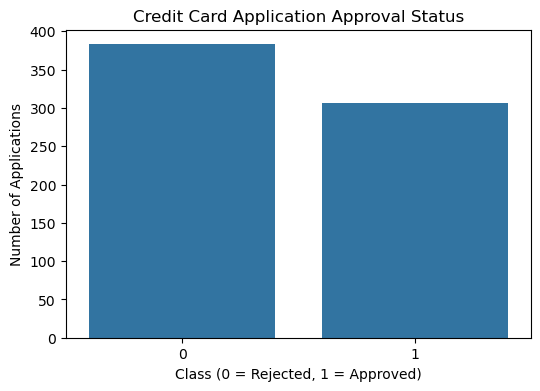

In [18]:
print(df['Class'].value_counts())

# Plot count of each class
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Credit Card Application Approval Status')
plt.xlabel('Class (0 = Rejected, 1 = Approved)')
plt.ylabel('Number of Applications')
plt.show()

**The dataset contains a total of 690 credit card applications. Out of these, 383 applications (55.5%) were rejected (Class = 0) and 307 applications (44.5%) were approved (Class = 1). The distribution between approved and rejected applications is fairly balanced, which is favorable for training classification models as it reduces bias towards one class.**

2. Identify features that have relationships with approval status to inform the selection of important predictors for the model.

In [56]:
correlations = df.corr()['Class'].sort_values(ascending=False)

print("Correlation of features with Class:")
print(correlations)

Correlation of features with Class:
Class         1.000000
A8            0.720407
A9            0.458301
A10           0.406410
A5            0.373712
A7            0.322475
A6            0.246567
A3            0.206294
A4            0.194306
A14           0.175657
A2            0.161626
A12           0.115261
CustomerID    0.035400
A11           0.031625
A1           -0.013897
A13          -0.099972
Name: Class, dtype: float64


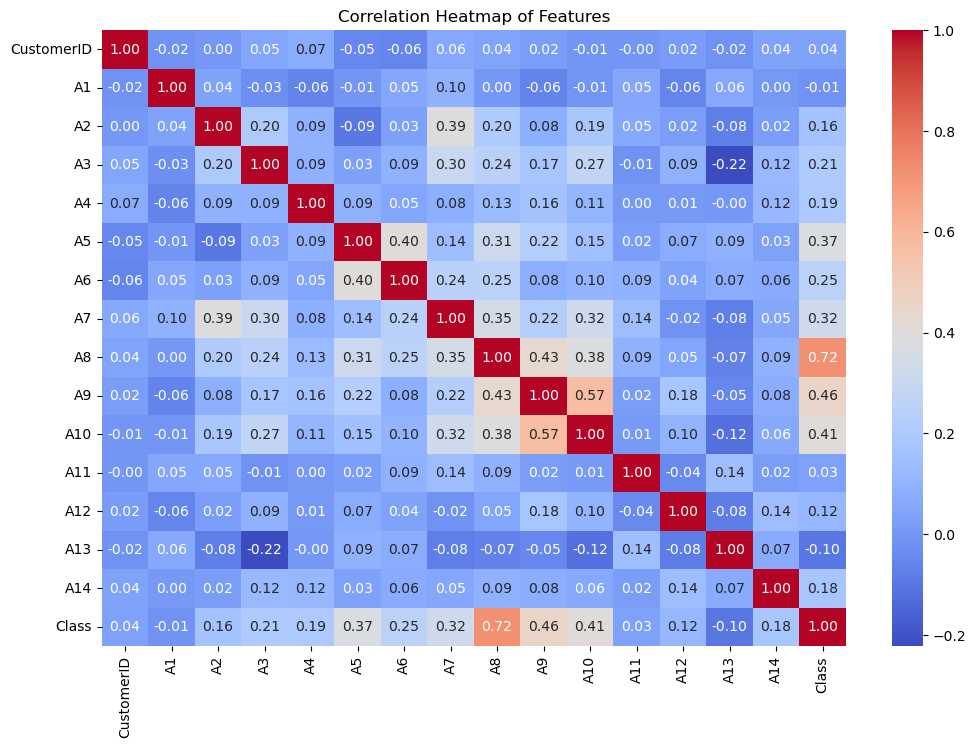

In [21]:
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title('Correlation Heatmap of Features')
plt.show()

**The features A8, A9, and A10 show the strongest positive correlation with credit card application approval, indicating they are key predictors. Several other features like A5, A7, and A6 have moderate positive correlations.**

# Machine Learning

In [111]:
# Machine learning codes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

1. Can we accurately predict credit card application approval using customer features?

In [70]:
X = df.drop(['CustomerID', 'Class'], axis=1)
y = df['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87        87
           1       0.82      0.71      0.76        51

    accuracy                           0.83       138
   macro avg       0.83      0.81      0.82       138
weighted avg       0.83      0.83      0.83       138


Confusion Matrix:
 [[79  8]
 [15 36]]


**The KNN model achieved 83% accuracy, performing well in predicting both approved and rejected applications. It showed strong precision and recall for rejections, though it missed some approvals. The model is reliable for identifying likely rejections and moderately effective for approvals.**

2. Can we find groups of similar credit card applicants based on their features?

In [89]:
# Prepare features (exclude target and ID)
X_cluster = df.drop(['CustomerID', 'Class'], axis=1)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

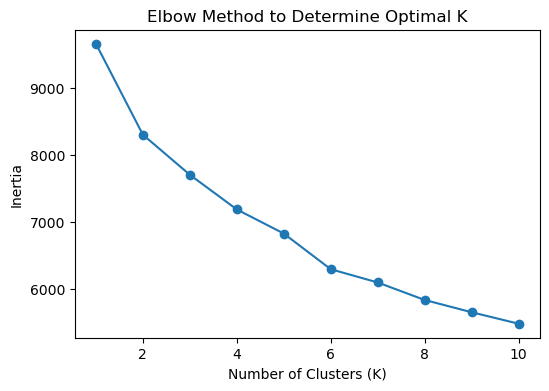

In [91]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(6,4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

The elbow method showed that 2 clusters is the optimal choice, suggesting the data naturally groups into two distinct segments.

3. How well do the clusters formed by K-Means align with the actual approval status of credit card applications?

In [113]:
X = df.drop(['CustomerID', 'Class'], axis=1)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = kmeans.labels_

# Compare clusters to actual class labels
conf_mat = pd.crosstab(df['Class'], df['Cluster'], rownames=['Actual'], colnames=['Cluster'])
print(conf_mat)

Cluster    0    1
Actual           
0        352   31
1         79  228


K-Means clustering grouped the data into two clusters that mostly correspond to approval status, with one cluster containing mostly rejected applications and the other mostly approved. There is some overlap, but overall the clustering reflects meaningful patterns in the data.

### Conclusions


This project analyzed credit card application data using exploratory data analysis, machine learning, and big data tools. The EDA revealed key features related to application approval status. The K-Nearest Neighbors model achieved good accuracy in predicting approvals. K-Means clustering identified natural groupings in the data that largely corresponded with approval and rejection classes, confirming meaningful patterns without using labels.

###  References
   - Academic (if any)
   - Online (if any)
	

### Credits

- If you use and/or adapt your code from existing projects, you must provide links and acknowldge the authors. 
> *This code is based on .... (if any)*

In [ ]:
# End of Project